## 4.1.6 재현 신경망(Recurrent Neural Network) 분류 모델

In [20]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split

import os
import json

from tqdm import tqdm

## 시각화

In [2]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string], '')
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

## 학습 데이터 파일 로드

In [3]:
DATA_IN_PATH = './data_in/'
DATA_OUT_PATH = './data_out/'

TRAIN_INPUT_DATA = 'train_input.npy'
TRAIN_LABEL_DATA = 'train_label.npy'
DATA_CONFIGS = 'data_configs.json'

In [4]:
train_input = np.load(open(DATA_IN_PATH + TRAIN_INPUT_DATA, 'rb'))
train_input = pad_sequences(train_input, maxlen=train_input.shape[1])
train_label = np.load(open(DATA_IN_PATH + TRAIN_LABEL_DATA, 'rb'))
prepro_configs = None

with open(DATA_IN_PATH + DATA_CONFIGS, 'r') as f:
    prepro_configs = json.load(f)

## 모델 정의

In [5]:
VOCAB_SIZE = prepro_configs['vocab_size']+1

BATCH_SIZE = 128
NUM_EPOCHS = 10
VALID_SPLIT = 0.1

In [6]:
print(len(prepro_configs['vocab']), VOCAB_SIZE) #check the number of vocab

74065 74066


In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(VOCAB_SIZE, 64),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

print(model.summary())

W0105 15:04:03.719559 4392965568 deprecation.py:506] From /Users/user/pt/lib/python3.6/site-packages/tensorflow/python/keras/initializers.py:119: calling RandomUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0105 15:04:03.722311 4392965568 deprecation.py:506] From /Users/user/pt/lib/python3.6/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0105 15:04:03.840655 4392965568 deprecation.py:323] From /Users/user/pt/lib/python3.6/site-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          4740224   
_________________________________________________________________
conv1d (Conv1D)              (None, None, 128)         41088     
_________________________________________________________________
global_max_pooling1d (Global (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 4,789,633
Trainable params: 4,789,633
Non-trainable params: 0
______________________________________________

In [8]:
# overfitting을 막기 위한 ealrystop 추가
earlystop_callback = EarlyStopping(monitor='val_accuracy', min_delta=0.0001,patience=1)
# min_delta: the threshold that triggers the termination (acc should at least improve 0.0001)
# patience: no improvment epochs (patience = 1, 1번 이상 상승이 없으면 종료)

history = model.fit(train_input, train_label, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS,
                    validation_split=VALID_SPLIT, callbacks=[earlystop_callback])

Train on 22500 samples, validate on 2500 samples
Epoch 1/10
22400/22500 [============================>.] - ETA: 0s - loss: 0.6929 - acc: 0.5128

W0105 15:04:14.286189 4392965568 callbacks.py:1259] Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,acc,val_loss,val_acc


22500/22500 [==============================] - 10s 441us/sample - loss: 0.6929 - acc: 0.5132 - val_loss: 0.6909 - val_acc: 0.6288
Epoch 2/10
22400/22500 [============================>.] - ETA: 0s - loss: 0.6854 - acc: 0.6103

W0105 15:04:24.275893 4392965568 callbacks.py:1259] Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,acc,val_loss,val_acc


22500/22500 [==============================] - 10s 444us/sample - loss: 0.6854 - acc: 0.6108 - val_loss: 0.6815 - val_acc: 0.7544
Epoch 3/10
22400/22500 [============================>.] - ETA: 0s - loss: 0.6449 - acc: 0.7420

W0105 15:04:34.475399 4392965568 callbacks.py:1259] Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,acc,val_loss,val_acc


22500/22500 [==============================] - 10s 453us/sample - loss: 0.6448 - acc: 0.7418 - val_loss: 0.6044 - val_acc: 0.7596
Epoch 4/10
22400/22500 [============================>.] - ETA: 0s - loss: 0.5296 - acc: 0.7852

W0105 15:04:44.366384 4392965568 callbacks.py:1259] Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,acc,val_loss,val_acc


22500/22500 [==============================] - 10s 440us/sample - loss: 0.5293 - acc: 0.7852 - val_loss: 0.4758 - val_acc: 0.8132
Epoch 5/10
22400/22500 [============================>.] - ETA: 0s - loss: 0.4084 - acc: 0.8397

W0105 15:04:54.637850 4392965568 callbacks.py:1259] Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,acc,val_loss,val_acc


22500/22500 [==============================] - 10s 456us/sample - loss: 0.4082 - acc: 0.8397 - val_loss: 0.3890 - val_acc: 0.8412
Epoch 6/10
22400/22500 [============================>.] - ETA: 0s - loss: 0.3245 - acc: 0.8775

W0105 15:05:05.898794 4392965568 callbacks.py:1259] Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,acc,val_loss,val_acc


22500/22500 [==============================] - 11s 500us/sample - loss: 0.3246 - acc: 0.8774 - val_loss: 0.3481 - val_acc: 0.8616
Epoch 7/10
22400/22500 [============================>.] - ETA: 0s - loss: 0.2622 - acc: 0.9059

W0105 15:05:16.476909 4392965568 callbacks.py:1259] Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,acc,val_loss,val_acc


22500/22500 [==============================] - 11s 470us/sample - loss: 0.2622 - acc: 0.9059 - val_loss: 0.3267 - val_acc: 0.8724
Epoch 8/10
22400/22500 [============================>.] - ETA: 0s - loss: 0.2106 - acc: 0.9311

W0105 15:05:26.527332 4392965568 callbacks.py:1259] Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,acc,val_loss,val_acc


22500/22500 [==============================] - 10s 447us/sample - loss: 0.2103 - acc: 0.9312 - val_loss: 0.3186 - val_acc: 0.8740
Epoch 9/10
22400/22500 [============================>.] - ETA: 0s - loss: 0.1676 - acc: 0.9495

W0105 15:05:36.678828 4392965568 callbacks.py:1259] Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,acc,val_loss,val_acc


22500/22500 [==============================] - 10s 451us/sample - loss: 0.1673 - acc: 0.9496 - val_loss: 0.3190 - val_acc: 0.8760
Epoch 10/10
22400/22500 [============================>.] - ETA: 0s - loss: 0.1319 - acc: 0.9645

W0105 15:05:46.640882 4392965568 callbacks.py:1259] Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,acc,val_loss,val_acc


22500/22500 [==============================] - 10s 443us/sample - loss: 0.1318 - acc: 0.9646 - val_loss: 0.3242 - val_acc: 0.8752


In [14]:
plot_graphs(history, 'accuracy')

KeyError: 'accuracy'

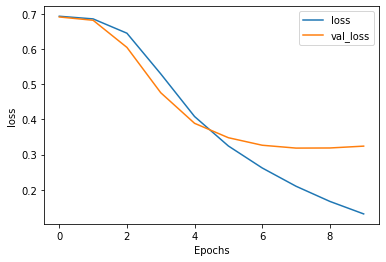

In [11]:
plot_graphs(history, 'loss')

## 모델 저장

In [16]:
if not os.path.exists(DATA_OUT_PATH):
    os.makedirs(DATA_OUT_PATH)

model.save_weights(DATA_OUT_PATH + 'cnn_model.h5')

## 캐글 평가 데이터셋 만들기

In [17]:
DATA_OUT_PATH = './data_out/'
TEST_INPUT_DATA = 'test_input.npy'
TEST_ID_DATA = 'test_id.npy'

test_input = np.load(open(DATA_IN_PATH + TEST_INPUT_DATA, 'rb'))
test_input = pad_sequences(test_input, maxlen=test_input.shape[1])

In [21]:
model.load_weights(DATA_OUT_PATH + 'cnn_model.h5')

In [22]:
BLOCK_SIZE = 500

predictions = [model(test_input[i*BLOCK_SIZE:i*BLOCK_SIZE+BLOCK_SIZE]).numpy() \
               for i in tqdm(range(test_input.shape[0] // BLOCK_SIZE))]

  0%|          | 0/50 [00:00<?, ?it/s]

AttributeError: 'Tensor' object has no attribute 'numpy'

In [ ]:
predictions = np.concatenate(predictions, axis=-2).squeeze(-1)

In [ ]:
test_id = np.load(open(DATA_IN_PATH + TEST_ID_DATA, 'rb'), allow_pickle=True)

In [ ]:
if not os.path.exists(DATA_OUT_PATH):
    os.makedirs(DATA_OUT_PATH)

output = pd.DataFrame(data={"id": list(test_id), "sentiment":list(predictions)} )
output.to_csv(DATA_OUT_PATH + 'movie_review_result_rnn.csv', index=False, quoting=3 )